<a href="https://colab.research.google.com/github/dunguyen0102/ml_k46/blob/main/Demo_PreprocessingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bước 1. Kết nối Drive để đọc dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks/DS'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/DS


#Bước 2. Import các thư viện cần thiết

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

#Bước 3. Đọc dữ liệu cần xử lý

In [ ]:
dataset = pd.read_csv('salary.csv')
dataset.set_index('No')
dataset.drop(['No'], axis=1, inplace=True)

In [ ]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


#Bước 4. Xem xét thông tin cơ bản về dữ liệu

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
dataset.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [ ]:
#Thống kê về dữ liệu
dataset.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


(array([2., 4., 3.]),
 array([27.        , 34.66666667, 42.33333333, 50.        ]),
 <BarContainer object of 3 artists>)

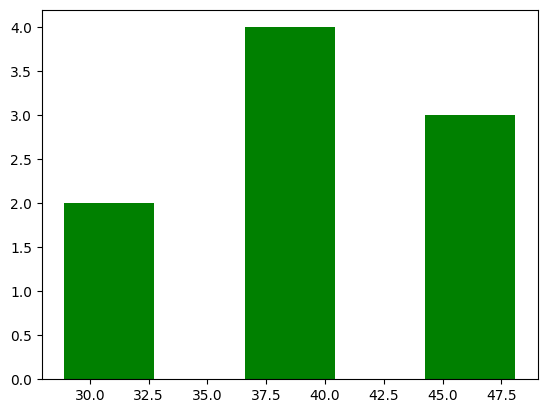

In [ ]:
#Xem phân bố của độ tuổi
plt.hist(dataset['Age'], bins=3, color='green', histtype='bar', rwidth=0.5)

(array([4., 2., 3.]),
 array([48000.        , 59666.66666667, 71333.33333333, 83000.        ]),
 <BarContainer object of 3 artists>)

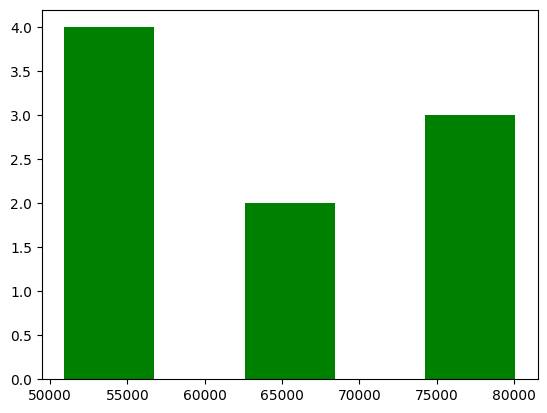

In [ ]:
#Xem phân bố của mức luong
plt.hist(dataset['Salary'], bins=3, color='green', histtype='bar', rwidth=0.5)

# Tính tỉ lệ % bị thiếu

In [ ]:
def missing_rate(dataset):
  total_missing = dataset.isnull().sum().sum()
  #dataset.isnull().sum(): số lượng thiếu theo từng thuộc tính. dataset.isnull().sum().sum(): tổng số giá trị bị thiếu
  # print(dataset.isnull().sum())
  percent_missing = (total_missing / dataset.size) * 100 # tính theo %
  return dataset.size, total_missing, round(percent_missing,2) # trả về 3 thông tin: kích thước dataset, số lượng giá trị bị thiếu, tỉ lệ thiếu

In [ ]:
missing_rate(dataset)

(40, 2, 5.0)

# Tính tỉ lệ % bị thiếu cho từng thuộc tính

In [ ]:
def display_missing_percent(dataset):
  total = dataset.isnull().sum().sort_values(ascending=False)
  percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)#phần trăm thiếu theo từng thuộc tính
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  f, ax = plt.subplots(figsize=(15, 6))
  sns.barplot(x=missing_data.index, y=missing_data['Percent'])
  plt.xlabel('Features', fontsize=15)
  plt.ylabel('% dữ liệu bị thiếu', fontsize=15)
  plt.title('% dữ liệu bị thiếu theo thuộc tính', fontsize=15)
  missing_data.head

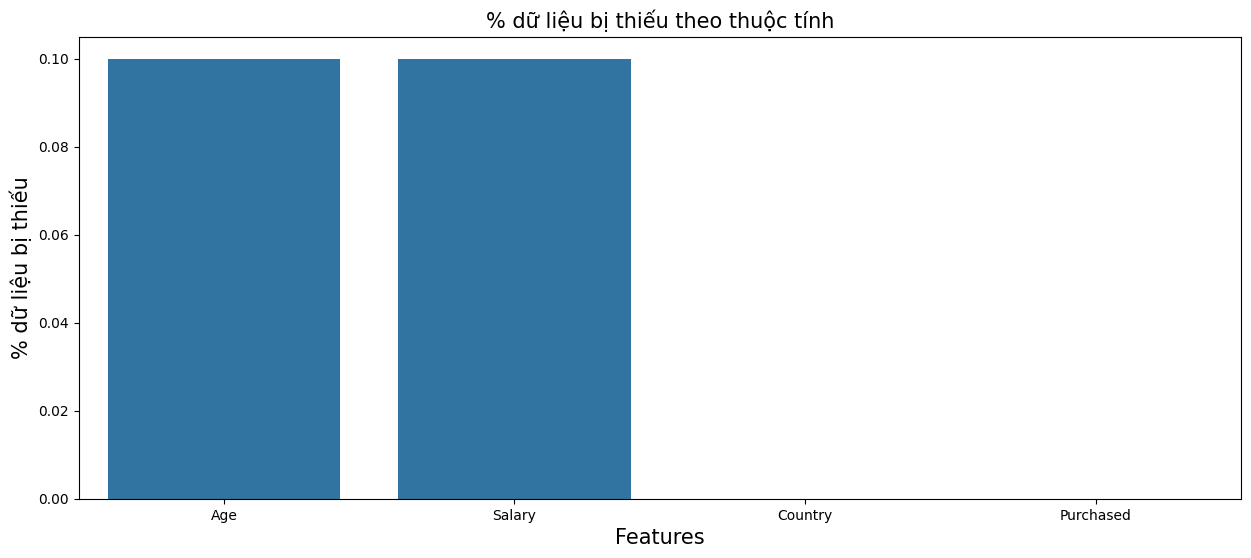

In [ ]:
display_missing_percent(dataset)

#Điền dữ liệu bị thiếu theo mean

In [ ]:
dataset1 = dataset.copy()
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset1[['Age', 'Salary']])
dataset1[['Age', 'Salary']] = imputer.transform(dataset1[['Age', 'Salary']])

In [ ]:
dataset1

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [ ]:
dataset1 = dataset.copy()
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(dataset1[['Age', 'Salary']])
dataset1[['Age', 'Salary']] = imputer.transform(dataset1[['Age', 'Salary']])

#Điền giá trị bị thiếu theo kNN

In [ ]:
dataset2 = dataset.copy()
imputer = KNNImputer(n_neighbors=2)#k=2
dataset2 = imputer.fit_transform(dataset2[['Age', 'Salary']])

In [ ]:
dataset2

array([[4.40e+01, 7.20e+04],
       [2.70e+01, 4.80e+04],
       [3.00e+01, 5.40e+04],
       [3.80e+01, 6.10e+04],
       [4.00e+01, 6.40e+04],
       [3.50e+01, 5.80e+04],
       [2.85e+01, 5.20e+04],
       [4.80e+01, 7.90e+04],
       [5.00e+01, 8.30e+04],
       [3.70e+01, 6.70e+04]])